# Bài tập 3

* Dataset: [Dry Bean](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset)
* Bài toán: phân loại (7 lớp)

## 1 - Tổng quan về tập dữ liệu

### 1.1 - Phương pháp thu thập dữ liệu

![dry bean 1](https://download.hoadm.net/images/drybean-1.png)
![dry bean 2](https://download.hoadm.net/images/drybean-2.png)
![dry bean 3](https://download.hoadm.net/images/drybean-3.png)

[1] KOKLU, M. and OZKAN, I.A., (2020), â€œMulticlass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.â€ Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

### 1.2 - Ý nghĩa các thuộc tính

Tập dữ liệu gồm 13,611 dòng dữ liệu, là ảnh chụp (bằng máy ảnh kỹ thuật số chất lượng cao) 7 loại đậu khô, sau đó rút trích ra 16 thuộc tính:

* 12 thuộc tính đầu kiểu số thực biểu diễn kích thước:
    * Area (A): diện tích hạt đậu (tính bằng số lượng pixels)
    * Perimeter (P): chu vi của hạt đậu
    * MajorAxisLength (L): đường kính trục lớn (hình elip)
    * MinorAxisLength (l):  đường kính trục bé (hình elip)
    * AspectRation (K): tỉ lệ giữa thuộc tính 3 và 4 (MajorAxisLength/MinorAxisLength)
    * Eccentricity (Ec): [độ lệch tâm](https://vi.wikipedia.org/wiki/%C4%90%E1%BB%99_l%E1%BB%87ch_t%C3%A2m)
    * ConvexArea (C): diện tích của đa giác lồi nhỏ nhất, có thể chứa được diện tích hạt đậu
    * EquivDiameter (Ed): Đường kính của hình tròn có cùng diện tích với hạt đậu
    * Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
    * Solidity (S): còn được gọi là độ lồi, là tỉ lệ giữa số lượng pixels trong phần lồi với pixels bên trong
    * Roundness (R): được tính theo công thức $\frac{4 \times PI \times A}{P^2}$
    * Compactness (CO): đo độ tròn $\frac{Ed}{L}$


* 4 thuộc tính kế tiếp kiểu số thực biểu diễn các tỉ lệ:
    * ShapeFactor1 (SF1): $SF1 = \frac{L}{A}$
    * ShapeFactor2 (SF2): $SF2 = \frac{l}{A}$
    * ShapeFactor3 (SF3): $SF3 = \frac{A}{\frac{L}{2} * \frac{L}{2} * \pi}$
    * ShapeFactor4 (SF4): $SF4 = \frac{A}{\frac{L}{2} * \frac{l}{2} * \pi}$
    

In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder

from hmd import *

pd.set_option('display.max_columns', None)
plt.rcParams['figure.dpi'] = 100

## 2 - Rút trích đặc trưng

Tập dữ liệu Dry bean đã được rút trích đặc trưng sẵn trong qúa trình thu thập dữ liệu, có thể sử dụng trực tiếp

In [2]:
DATA_FILE = './data/drybean/data.csv'
df = pd.read_csv(DATA_FILE)
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

## 3 - Phân tích khám phá dữ liệu

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

#### Hàm info sẽ cung cấp 1 số thông tin sau:
* Danh sách các thuộc tính (column)
* Số lượng thuộc tính có giá trị -> có thể suy ra thuộc tính này có bị thiếu giá trị không?
* kiểu dữ liệu tương ứng với thuộc tính -> dựa vào đó để sử dụng các phương thức thống kê cho hợp lý.



**Lưu ý**: Có 1 vài trường hợp, thuộc tính đã được mã hóa sẵn (ví dụ label encode). Mặc dù kiểu dữ liệu và int hoặc float nhưng bản chất của chúng vẫn là categorical => các phương thức mean, max, min...vv trên thuộc tính này không có ý nghĩa.

In [4]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

#### Hàm describe 

Dựa trên kiểu dữ liệu của thuộc tính, hàm [descirbe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) sẽ thực hiện 1 số phương thức thống kê tương ứng.

Sau bước số 2 sẽ rút ra được 1 số nhận xét nhỏ -> để tiếp tục các bước sau


**Nhận xét**:

1. Dữ liệu gồm 17 cột (16 thuộc tính + nhãn). Kiểu dữ liệu của các cột phù hợp với mô tả ban đầu về dữ liệu
2. Tất cả các thuộc tính (16 cột đầu) đều là kiểu dữ liệu số 
3. Tập dữ liệu gồm 13611 dòng dữ liệu, không thuộc tính nào bị thiếu giá trị
4. Vì tất cả các thuộc tính đều là kiểu số nên hàm describe có thể thể hiện các thuộc tính thống kê đầy đủ.
5. Giá trị các thuộc tính chênh lệch tương đối lớn

=> Với những nhận xét trên, rút ra kết luận:

1. Không cần thực hiện mã hóa dữ liệu (tất cả đã là kiểu số)
2. Không cần làm sạch dữ liệu (dữ liệu đầy đủ, không bị thiếu xót dữ liệu)
3. Cần chuẩn hóa trước khi học

## 4 - Trực quan hóa dữ liệu

Mặc dù hàm descirbe cung cấp tương đối đầy đủ thông tin -> cũng rất khó để hình dung chi tiết, do đó chúng ta có thể sử dụng biểu đồ để thấy rõ hơn

In [5]:
"""
    Sử dụng biểu đồ cột (bar chart) để thể hiện tần số của từng loại đậu trong tập dữ liệu.
    Bước này rất quan trọng, để biết được thông tin như: tập dữ liệu cân bằng không? 
    hay bị mất cân bằng để có phương án xử lý và có lưu ý khi đưa ra đánh giá mô hình
"""

ax = df['Class'].value_counts().plot(kind='bar', title ="Số lượng đậu trong mỗi loại")
        
ax.set_xlabel("Loại đậu")
ax.set_ylabel("Số lượng mẫu")
plt.show()

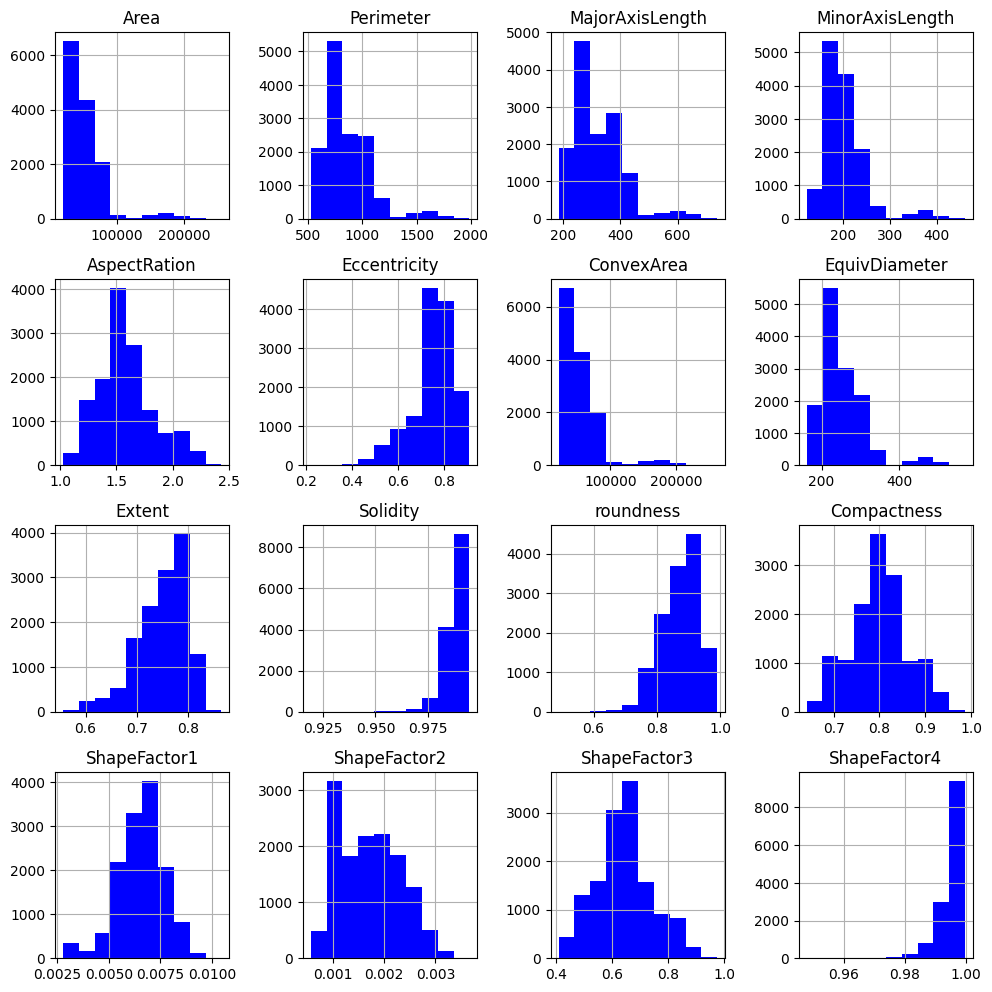

In [6]:
rows = 4
cols = 4

fig, ax = plt.subplots(rows, cols, figsize=(10, 10))
attrs = df.columns[0: -1] # lấy tất cả các cột, trừ cột cuối

for i in range(rows):
    for j in range(cols):
        idx = cols*i + j 
        df[attrs].hist(column=df[attrs].columns[idx], ax=ax[i][j], color='b')

fig.tight_layout(pad=1.0)
plt.show()

Ở bước này, tất cả các thuộc tính được trình bày dưới dạng hist plot. Biểu đồ này sẽ cho chúng ta biết được phân phối của thuộc tính.

Việc đọc biểu đồ phân phối phụ thuộc vào nhiều yếu tố, nhưng ở mức cơ bản, chúng ta có thể nắm được các thông tin:
* thuộc tính X có dạng phân phối như thế nào:
    * [phân phối chuẩn](https://vi.wikipedia.org/wiki/Ph%C3%A2n_ph%E1%BB%91i_chu%E1%BA%A9n)
    * Có bị lệch không (lệch trái, lệch phải ...)
    * ...
    
Dựa vào phân phối này, chúng ta cũng có thể đặt ra các giả thiết như:
* Ví dụ: tất cả các thuộc tính đều phân theo phân phối chuẩn: bộ phân lớp có thể tốt không?
* Thuộc tính **Area** có 2 đỉnh, vậy đây có thể là 1 thuộc tính có giá trị cao
* ....


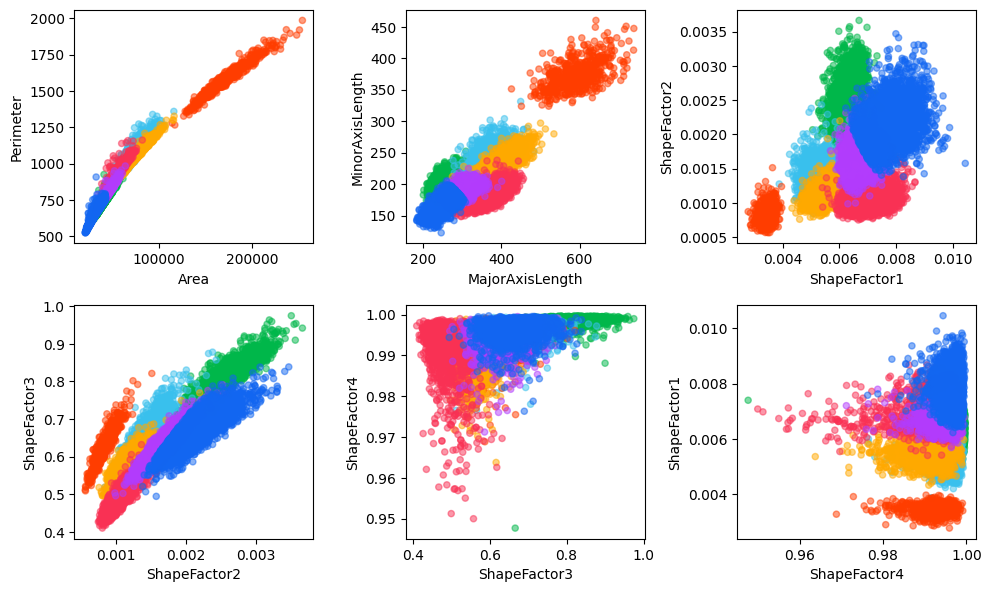

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

colors = {
    'DERMASON': '#1266F1',
    'SIRA': '#B23CFD',
    'SEKER': '#00B74A',
    'HOROZ': '#F93154',
    'CALI': '#FFA900',
    'BARBUNYA': '#39C0ED',
    'BOMBAY': '#FF3D00'
}
color_map = df['Class'].map(colors)

df.plot.scatter(x='Area', y='Perimeter', c=color_map, ax=ax[0][0], alpha=0.5)
df.plot.scatter(x='MajorAxisLength', y='MinorAxisLength', c=color_map, ax=ax[0][1], alpha=0.5)
df.plot.scatter(x='ShapeFactor1', y='ShapeFactor2', c=color_map, ax=ax[0][2], alpha=0.5)

df.plot.scatter(x='ShapeFactor2', y='ShapeFactor3', c=color_map, ax=ax[1][0], alpha=0.5)
df.plot.scatter(x='ShapeFactor3', y='ShapeFactor4', c=color_map, ax=ax[1][1], alpha=0.5)
df.plot.scatter(x='ShapeFactor4', y='ShapeFactor1', c=color_map, ax=ax[1][2], alpha=0.5)


fig.tight_layout(pad=1.0)
plt.show()

Bên cạnh hist, scatter thể hiện mối tương quan giữa 2 thuộc tính, cũng cho thấy được giá trị phân lớp của các thuộc tính.

## 5 - Làm sạch và mã hóa dữ liệu
Dựa vào kết luận ở bước 3, tập dữ liệu này không cần làm sạch cần mã hóa nhãn, sẽ thực hiện trong bước 6 sau khi đã chia dữ liệu train, test.


**Ghi chú**: tập dữ liệu này không bị thiếu, không có thuộc tính nào ở dạng Nominal nên bỏ qua bước này. Nếu dữ liệu có dạng Nominal thì cần phải mã hóa (label hoặc onehot encode)

## 6 - Chuẩn hóa, kiểm thử

In [8]:
scalers = [
    '',
    'MinMaxScaler', 
    'Normalizer', 
    'StandardScaler'
]

classifiers = [
    'k-Nearest Neighbors', 
    'Logistic Regression', 
    'Decision Tree', 
    'Gaussian NB', 
    'Support Vector Machine'
]

pipes = {}

for clf in classifiers:
    for scaler in scalers:
        steps = []
        name = "";
        
        if scaler:
            name += f"{scaler} - "
            steps.append(('scale', h_get_scaler(scaler)))


        name += f"{clf}"

        steps.append(('clf', h_get_clf(clf)))
        pipe = Pipeline(steps)
        pipes[name] = pipe


### Giải thích đoạn code phía trên

#### Pipeline 

* Đầu tiên, để thực hiện đoạn code này, chúng ta cần hiểu khái niệm [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline). Một cách đơn giản, sklearn cung cấp cho người dùng 1 phương thức, tạo 1 chuỗi hành động từ: \[rút trích đặc trung -> chuẩn hóa -> giảm chiều\](tiền xử lý dữ liệu) -> học -> kiểm thử.

* Tại sao phải sử dụng Pipeline? Để có thể dễ dàng xây dựng được các mô hình khác nhau. Ví dụ: với cùng 1 tập dữ liệu, chúng ta có thể xây dựng được các phương án như:

    * Chuẩn hóa (Minmax) - PCA - KNN
    * Chuẩn hóa (Minmax) - không sử dụng PCA - KNN
    * Không chuẩn hóa - sử dụng PCA - KNN
    * Không chuẩn hóa - không sử dụng PCA - KNN
    * Chuẩn hóa (Minmax) - PCA - Logistic Regression
    * Chuẩn hóa (Minmax) - không sử dụng PCA - Logistic Regression
    * Không chuẩn hóa - sử dụng PCA - Logistic Regression
    * Không chuẩn hóa - không sử dụng PCA - Logistic Regression
    * ...


Ví dụ chúng ta có:

* 3 phương pháp chuẩn hóa (MinMaxScaler, Normalizer, StandardScaler)
* PCA (có, không sử dụng) 
* 8 mô hình học máy: 
    * k-Nearest Neighbors
    * Logistic Regression
    * Decision Tree
    * Gaussian NB
    * Bernoulli NB
    * Multinomial NB
    * Support Vector Machine
    * LDA
        
Vậy theo lý thuyết XSTK, chúng ta có 3 * 2 * 8 = 48 phép thử. Nếu không sử dụng Pipline, chúng ta sẽ cần 48 cell code để làm việc này.


#### design patter 

* h_get_scaler
* h_get_clf

Trong file mẫu của thầy, có 1 đoạn code:

```
models = [LogisticRegression(),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier()]
          
methods = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier']
```

Sau đó for từng model. Cách làm này cũng được, nhưng nếu có thêm PCA, scaler, thì khai báo nhiều mảng, ... hơi rối. Để có thể hiểu rõ hơn, có thể đọc trong file notes/design-pattern.


#### Tổng kết 
Sau đoạn code này, chúng ta sẽ có 20 pipelines (4 phương án scale và 5 mô hình). Mỗi pipeline sẽ gồm 2 bước (steps): chuẩn hóa - học máy.

In [9]:
le = LabelEncoder()

X = df.iloc[:, :16].to_numpy()
t = df.iloc[:, -1].to_numpy()
y = le.fit_transform(t)

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape: (13611, 16)
y.shape: (13611,)


Chia tập dữ liệu thành các thành phần để học, kiểm thử. 

* Bước 1: tách tập dữ liệu thành matrix **X** và vector **t** (vector nhãn - dạng text)
* Bước 2: dùng label encoder để mã hóa vector **t** thành vector **y** (vector nhãn - dạng chỉ số)
* Bước 3: chia tập dữ liệu thành 2 phần, train - test với tỉ lệ 80-20

## 6 - Học máy

In [10]:
results = {}

for name, pipe in pipes.items():
    start_time = time.time()
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    elapsed_time = (time.time() - start_time)
    
    report = h_clf_report(y_test, y_pred, digits=2)
    report.append(elapsed_time)
    results[name] = report
    
columns = ['accuracy score', 'weighted avg precision', 'weighted avg precall', 'weighted avg f1-score', 'timing']
df_rs = pd.DataFrame.from_dict(results, orient="index", columns=columns)

/Users/hoadinh/Desktop/LEARNING/Master/ML/Lab/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hoadinh/Desktop/LEARNING/Master/ML/Lab/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

#### giải thích

Lúc này mỗi pipe (trong 20 pipes đã tạo phía trên) coi như 1 mô hình, cũng có thể fit và predict bình thường (vì cuối đường ống là 1 mô hình học máy, sau khi chạy, hệ thống sẽ return 1 mô hình được thông qua các bước trong pipeline).


Do các hàm của sklearn không return về mà print hết các thông số ra, do đó, để so sánh kết quả của các phương án (pipelines) chúng ta cần 1 hàm riêng (h_clf_report) được giả lập lại hàm của thư viện, tuy nhiên không in ra mà trả về kết quả. Các kết quả này đưa vào 1 mảng và in ra 1 lần

In [11]:
df_rs.style.apply(h_highlight_max).format("{:.2}")

**Nhận xét**:
* Dựa trên bảng so sánh, mô hình SVM với StandardScaler và Drop Data cho kết quả tốt nhất.
* Tiếp tục sử dụng các API của sklearn để xem report chi tiết hơn
* Trong bài toán này, với 7 lớp thì SVM chạy rất lâu so với những mô hình khác.
* Mô hình Logistic Regression với StandardScaler cho kết quả tốt và thời gian huấn luyện trung bình

In [13]:
clf = Pipeline([
    ('scale', h_get_scaler('StandardScaler')), 
    ('clf', h_get_clf('Logistic Regression'))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_.tolist()))


plot_confusion_matrix(clf, X_test, y_test)
plt.show()

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.95      0.94      0.94       317
    DERMASON       0.92      0.90      0.91       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.85      0.90      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



/Users/hoadinh/Desktop/LEARNING/Master/ML/Lab/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Nhận xét**:
* Mô hình cho kết quả tương đối tốt
* Dựa trên ma nhận nhầm lẫn, đậu thuộc 2 lớp 3 (DERMASON) và (SIRA) bị nhầm lẫn với nhau tương đối nhiều.
* Đậu ở lớp BOMBAY chiếm 1 phần nhỏ (chỉ khoảng 4% - 522/13611). Nhưng f1-score = 1.